In [1]:
!pip install ultralytics
!pip install cvzone

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.7/611.7 kB 11.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for cvzone: filename=cvzone-1.5.6-py3-none-any.whl size=18747 sha256=21842503416f2c3477f73dde75eb84130cf7061e417ba020268ff1067dfa6a15
  Stored in directory: /root/.cache/pip/wheels/d8/85/f1/1756f9e009d280be742fb20dd5087c60c2f7f0279964934375
Successfully built cvzone


In [2]:
from ultralytics import YOLO
import cv2
import cvzone
import math

In [3]:
from google.colab.patches import cv2_imshow

In [4]:
import torch

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import os
os.chdir('/content/drive/MyDrive/saira/safety_gear_detection')
HOME = os.getcwd()
HOME

'/content/drive/MyDrive/saira/safety_gear_detection'

In [7]:
img = cv2.imread(f"{HOME}/test_img.png")

model1 = YOLO(f"{HOME}/best.pt")
model2 = YOLO(f"{HOME}/model7.pt")

classNames1 = ['Excavator', 'Gloves', 'Helmet', 'Ladder', 'Mask', 'NO-Helmet', 'NO-Mask', 'NO-Safety Vest', 'Person', 'SUV', 'Safety Cone', 'Safety Vest', 'bus', 'dump truck', 'fire hydrant', 'machinery', 'mini-van', 'sedan', 'semi', 'trailer', 'truck and trailer', 'truck', 'van', 'vehicle', 'wheel loader']
classNames2 = ['boot', 'glove', 'helmet', 'jacket', 'without glove', 'without helmet', 'without jacket']

In [ ]:
detections = model1.predict(img)


0: 448x640 2 Glovess, 4 Hardhats, 4 NO-Masks, 4 Persons, 4 Safety Vests, 66.9ms
Speed: 11.5ms preprocess, 66.9ms inference, 33.7ms postprocess per image at shape (1, 3, 640, 640)


In [ ]:
detections[0].boxes.cls

tensor([ 8., 11., 11.,  8.,  1.,  8.,  2.,  2., 11.,  2.,  2., 11.,  1.,  6.,  6.,  6.,  8.,  6.], device='cuda:0')

In [ ]:
int(detections[0].boxes.cls[0])

8

In [ ]:
for r in detections:
        boxes = r.boxes
        for box in boxes:
            cls = int(box.cls[0])
            conf = math.ceil((box.conf[0] * 100)) / 100
            if cls == 8 :
                x1, y1, x2, y2 = box.xyxy[0]
                x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
                w, h = x2 - x1, y2 - y1
                result_in = model1.predict(img[y1:y2, x1:x2, :])
                boxes_in = result_in[0].boxes
                if 2 in boxes_in.cls and 11 in boxes_in.cls:
                  str_pt = ''
                  for cl in torch.unique(boxes_in.cls):
                    if cl!= 8:
                      str_pt += classNames1[int(cl)] + ' '
                  result2 = model2(img, stream=True)
                  for r2 in result2:
                      boxes2 = r2.boxes
                      for box2 in boxes2:
                          cls2 = int(box2.cls[0])
                          if cls2 == 0 :
                            str_pt += classNames2[cls2]
                  cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 255), 1)
                  cvzone.putTextRect(img, f'worker - {str_pt}', (max(0, x1), max(35, y1)), scale=1, thickness=1)

                else:
                  cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 255), 1)
                  cvzone.putTextRect(img, f'person', (max(0, x1), max(35, y1)), scale=1, thickness=1)


0: 640x288 1 Gloves, 1 Hardhat, 1 NO-Mask, 1 Person, 1 Safety Vest, 38.7ms
Speed: 2.5ms preprocess, 38.7ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

0: 448x640 4 helmets, 6 jackets, 39.5ms
Speed: 2.0ms preprocess, 39.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x320 1 Hardhat, 1 NO-Mask, 1 Person, 2 Safety Vests, 30.6ms
Speed: 1.9ms preprocess, 30.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 448x640 3 helmets, 6 jackets, 38.8ms
Speed: 2.9ms preprocess, 38.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x256 1 Hardhat, 1 NO-Mask, 1 Person, 2 Safety Vests, 22.4ms
Speed: 1.5ms preprocess, 22.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 448x640 1 helmet, 6 jackets, 28.6ms
Speed: 2.9ms preprocess, 28.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x224 1 NO-Mask, 2 Persons, 1 Safety Vest, 14.3ms
Speed: 2.4ms preprocess, 14.3m

In [ ]:
len(detections)

1

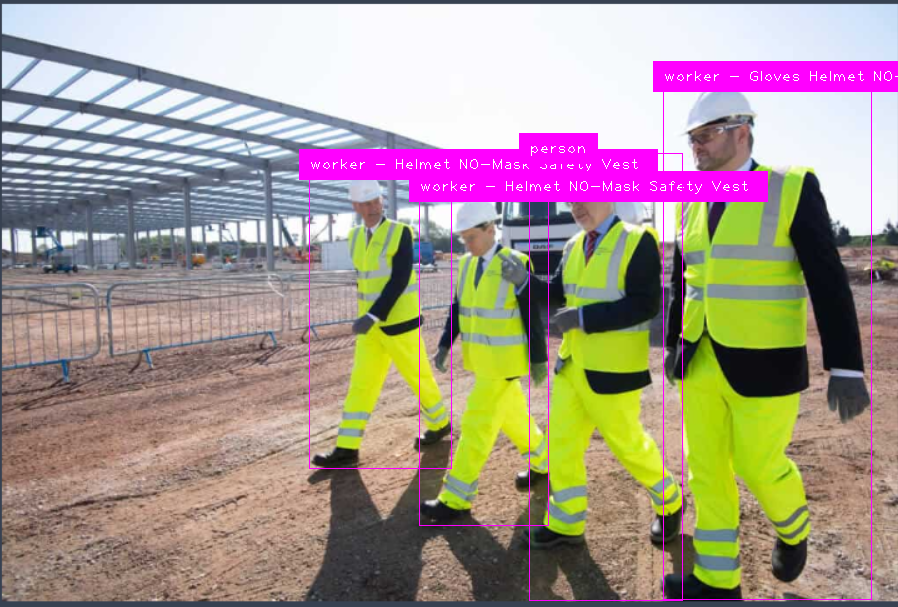

In [ ]:
cv2_imshow(img)

In [13]:

video_url = 'https://www.youtube.com/watch?v=Dhxf5mm7g1g'

!pip install git+https://github.com/ytdl-org/youtube-dl.git
!python -m youtube_dl -f 'bestvideo[ext=mp4]+bestaudio[ext=m4a]/mp4' "$video_url"
print('Video downloaded successfully')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/ytdl-org/youtube-dl.git to /tmp/pip-req-build-8x7ig6m4
  Running command git clone --filter=blob:none --quiet https://github.com/ytdl-org/youtube-dl.git /tmp/pip-req-build-8x7ig6m4
  Resolved https://github.com/ytdl-org/youtube-dl.git to commit 07af47960f3bb262ead02490ce65c8c45c01741e
  Preparing metadata (setup.py) ... done
[youtube] Dhxf5mm7g1g: Downloading webpage
[youtube] Dhxf5mm7g1g: Downloading player 6ed0d907
[dashsegments] Total fragments: 7
[download] Destination: Construction Site Safety Basics-Dhxf5mm7g1g.f136.mp4
[download] 100% of 69.19MiB in 00:02
[dashsegments] Total fragments: 1
[download] Destination: Construction Site Safety Basics-Dhxf5mm7g1g.f140.m4a
[download] 100% of 6.83MiB in 00:00
[ffmpeg] Merging formats into "Construction Site Safety Basics-Dhxf5mm7g1g.mp4"
Deleting original file Construction Site Safety Basics-Dhxf5mm7g1g.f136.mp4 

In [16]:
cap = cv2.VideoCapture(f"{HOME}/animation.mp4")  # For Video

frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
size = (frame_width, frame_height)

ans = cv2.VideoWriter(f'{HOME}/danimation_result.mp4',
                         cv2.VideoWriter_fourcc(*'mp4v'),cap.get(cv2.CAP_PROP_FPS), size)

In [17]:
while True:
    success, img = cap.read()
    if not success:
        break
    # img = cv2.resize(img2,(1280,720))
    detections = model1(img, stream=True)
    if not detections:
      continue;
    for r in detections:
        boxes = r.boxes
        for box in boxes:
            cls = int(box.cls[0])
            conf = math.ceil((box.conf[0] * 100)) / 100
            if cls == 8 :
                x1, y1, x2, y2 = box.xyxy[0]
                x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
                w, h = x2 - x1, y2 - y1
                if img != []:
                  result_in = model1.predict(img[y1:y2, x1:x2, :])
                  boxes_in = result_in[0].boxes
                  if 2 in boxes_in.cls or 11 in boxes_in.cls:
                    str_pt = ''
                    for cl in torch.unique(boxes_in.cls):
                      if cl!= 8:
                        str_pt += classNames1[int(cl)] + ' '
                    result2 = model2(img, stream=True)
                    for r2 in result2:
                        boxes2 = r2.boxes
                        for box2 in boxes2:
                            cls2 = int(box2.cls[0])
                            if cls2 == 0 :
                              str_pt += classNames2[cls2]
                    cv2.rectangle(img, (x1-10, y1+10), (x2+10, y2-1), (255, 0, 255), 1)
                    cvzone.putTextRect(img, f'worker - {str_pt}', (max(0, x1), max(35, y1)), scale=1, thickness=1)

                  else:
                    cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 255), 1)
                    cvzone.putTextRect(img, f'person', (max(0, x1), max(35, y1)), scale=1, thickness=1)

    ans.write(img)
    # cv2.imshow("Image", img)
    # cv2.waitKey(1)

ans.release()
cv2.destroyAllWindows()

Streaming output truncated to the last 5000 lines.

0: 640x384 1 Person, 2 Safety Vests, 21.9ms
Speed: 2.2ms preprocess, 21.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 helmet, 21.2ms
Speed: 1.8ms preprocess, 21.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
0: 384x640 1 Hardhat, 1 Person, 1 Safety Vest, 20.9ms
Speed: 2.1ms preprocess, 20.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


0: 640x416 1 Person, 1 Safety Vest, 22.4ms
Speed: 2.2ms preprocess, 22.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 helmet, 23.3ms
Speed: 1.9ms preprocess, 23.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
0: 384x640 1 Gloves, 1 Hardhat, 1 Person, 1 Safety Vest, 25.4ms
Speed: 1.8ms preprocess, 25.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


0: 640x416 1 Person, 1 Safety Vest, 22.1ms
Speed: 2.1ms preprocess, 22.1ms inference, 2.1ms postpro

In [ ]:
os.getcwd()

'/content/drive/MyDrive/saira/safety_gear_detection'